Effective absorption depth modelling
Finley Giles-Book - fdg2.hw.ac.uk - 13/10/2020


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# All efficiency models are normalized between 1 and 0, to get percentage multiply by 100

import numpy as np

## AFC Efficiency for backwards propagation Gaussian peaks
def AFC_gb(d_tilde,F,d0):
    eta = (1 - np.exp(-d_tilde))**2 * np.exp(-7/F**2) * np.exp(-d0)
    return eta

## AFC Efficiency for forwards propagation Gaussian peaks
def AFC_gf(d_tilde,F,d0):
    eta = d_tilde**2 * np.exp(-d_tilde) * np.exp(-7/F**2) * np.exp(-d0)
    return eta

## AFC Efficiency for backwards propagation square peaks
def AFC_sb(d_tilde,F,d0):
    eta = (1 - np.exp(-d_tilde))**2 * (np.sinc(1/F))**2 * np.exp(-d0)
    return eta

## AFC Efficiency for forwards propagation square peaks
def AFC_sf(d_tilde,F,d0):
    eta = d_tilde**2 * np.exp(-d_tilde) * (np.sinc(1/F))**2 * np.exp(-d0)
    return eta


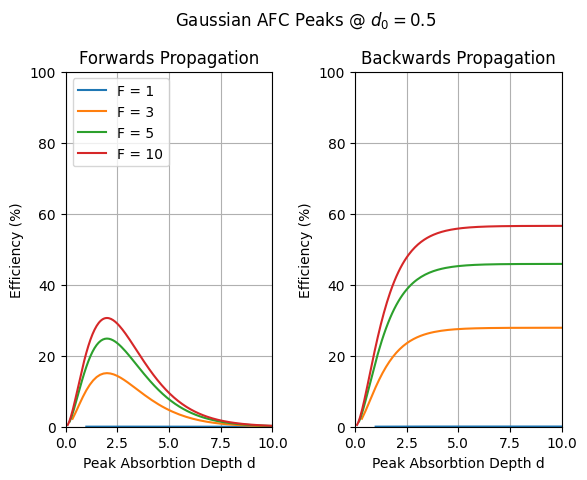

In [2]:
## Efficiency vs Effective Absorbtion Depth ##

F = np.array([1,3,5,10])     # Finesse
d0 = 0.5                        # Background absorbtion
d = np.linspace(1,500,1000)     # Peak absorbtion depth
d_tilde_10 = d/F[0]             # Effective absorbtion @ F = 10
d_tilde_20 = d/F[1]             # Effective absorbtion @ F = 20
d_tilde_30 = d/F[2]             # Effective absorbtion @ F = 30
d_tilde_50 = d/F[3]             # Effective absorbtion @ F = 50

## Gaussian AFC Peaks ##

fig1 ,(ax1, ax2) = plt.subplots(1, 2)
fig1.suptitle(r'Gaussian AFC Peaks @ $d_{0} = %.1f$' %d0)

ax1.plot(d_tilde_10, 100*AFC_gf(d_tilde_10,F[0],d0), label = 'F = %d' %F[0])
ax1.plot(d_tilde_20, 100*AFC_gf(d_tilde_20,F[1],d0), label = 'F = %d' %F[1])
ax1.plot(d_tilde_30, 100*AFC_gf(d_tilde_30,F[2],d0), label = 'F = %d' %F[2])
ax1.plot(d_tilde_50, 100*AFC_gf(d_tilde_50,F[3],d0), label = 'F = %d' %F[3])

ax1.set_title('Forwards Propagation')
ax1.set_ylabel('Efficiency (%)')
ax1.set_xlabel('Peak Absorbtion Depth d')
ax1.set_ylim(0,100)
ax1.set_xlim(0,10)
ax1.grid('true')
ax1.legend(loc = 'upper left')


ax2.plot(d_tilde_10,100*AFC_gb(d_tilde_10,F[0],d0))
ax2.plot(d_tilde_20,100*AFC_gb(d_tilde_20,F[1],d0))
ax2.plot(d_tilde_30,100*AFC_gb(d_tilde_30,F[2],d0))
ax2.plot(d_tilde_50,100*AFC_gb(d_tilde_50,F[3],d0))

ax2.set_title('Backwards Propagation')
ax2.set_ylabel('Efficiency (%)')
ax2.set_xlabel('Peak Absorbtion Depth d')
ax2.set_ylim(0,100)
ax2.set_xlim(0,10)
ax2.grid('true')

fig1.subplots_adjust(top = 0.85, wspace = 0.4)

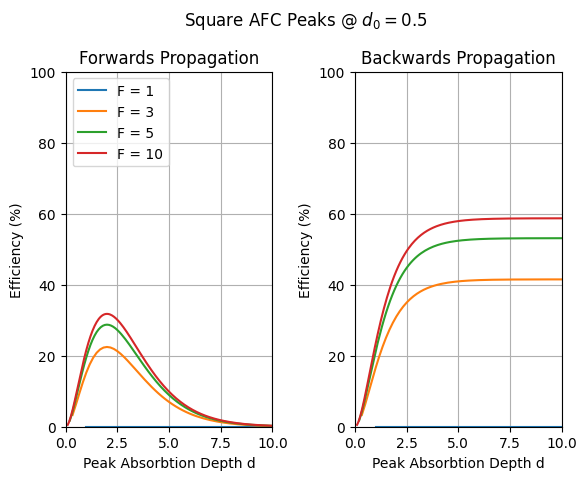

In [3]:
## Square AFC Peaks ##

fig2 ,(ax1, ax2) = plt.subplots(1, 2)
fig2.suptitle('Square AFC Peaks @ $d_{0} = %.1f$' %d0)

ax1.plot(d_tilde_10, 100*AFC_sf(d_tilde_10,F[0],d0), label = 'F = %d' %F[0])
ax1.plot(d_tilde_20, 100*AFC_sf(d_tilde_20,F[1],d0), label = 'F = %d' %F[1])
ax1.plot(d_tilde_30, 100*AFC_sf(d_tilde_30,F[2],d0), label = 'F = %d' %F[2])
ax1.plot(d_tilde_50, 100*AFC_sf(d_tilde_50,F[3],d0), label = 'F = %d' %F[3])

ax1.set_title('Forwards Propagation')
ax1.set_ylabel('Efficiency (%)')
ax1.set_xlabel('Peak Absorbtion Depth d')
ax1.set_ylim(0,100)
ax1.set_xlim(0,10)
ax1.grid('true')
ax1.legend(loc = 'upper left')


ax2.plot(d_tilde_10,100*AFC_sb(d_tilde_10,F[0],d0))
ax2.plot(d_tilde_20,100*AFC_sb(d_tilde_20,F[1],d0))
ax2.plot(d_tilde_30,100*AFC_sb(d_tilde_30,F[2],d0))
ax2.plot(d_tilde_50,100*AFC_sb(d_tilde_50,F[3],d0))

ax2.set_title('Backwards Propagation')
ax2.set_ylabel('Efficiency (%)')
ax2.set_xlabel('Peak Absorbtion Depth d')
ax2.set_ylim(0,100)
ax2.set_xlim(0,10)
ax2.grid('true')

fig2.subplots_adjust(top = 0.85, wspace = 0.4)